In [1]:
from ogs6py.ogs import OGS
import vtuIO
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams.update({'font.size': 16})

/home/mehran/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [2]:
model_hb=OGS(INPUT_FILE="load_test_hb_nonassociated.prj", PROJECT_FILE="load_test_hb_nonassociated.prj")

In [3]:
model_hb.run_model(path='~/build-release/bin')

OGS finished with project file load_test_hb_nonassociated.prj.
Execution took 59.065324544906616 s


In [4]:
pvd_hb = vtuIO.PVDIO("load_test_hb.pvd", dim=2)

In [5]:
pts = {"pt0": (1000,500,0.0)}

In [6]:
results_hb = {}

In [7]:
results_hb["displacement"] = pvd_hb.read_time_series("displacement", pts=pts)

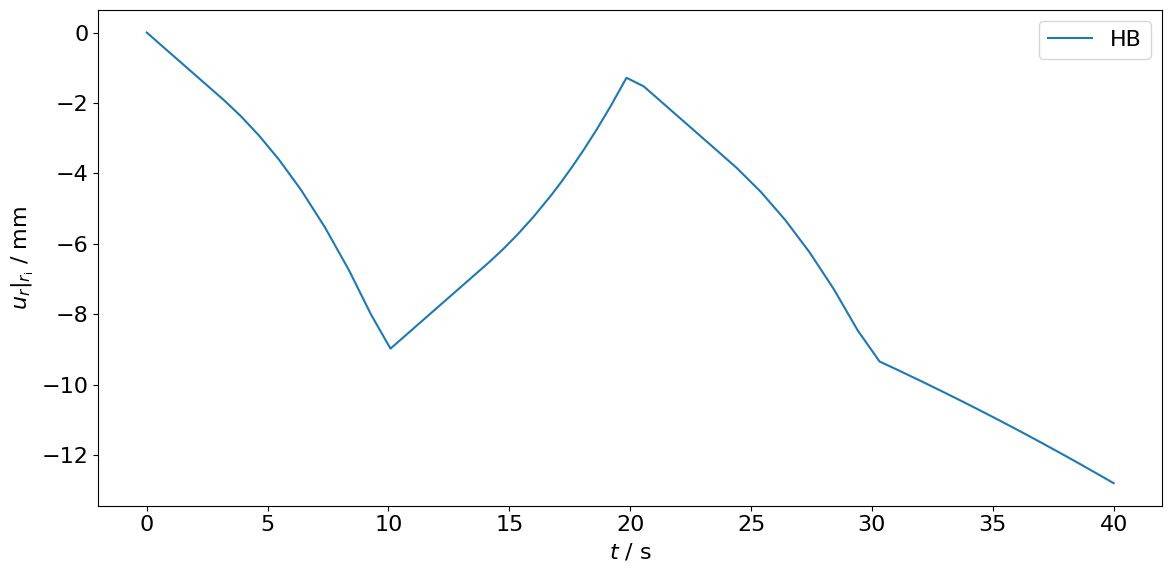

In [8]:
fig, ax = plt.subplots(figsize=(12,6))
ax.plot(pvd_hb.timesteps,results_hb['displacement']['pt0'].T[0],label='HB')
ax.set_xlabel('$t$ / s')
ax.set_ylabel('$u_r|_{r_\\mathrm{i}}$ / mm')
ax.legend()
fig.tight_layout();

In [9]:
raxis =  [(i,500,0) for i in np.linspace(start=1000, stop=8000, num=500)]

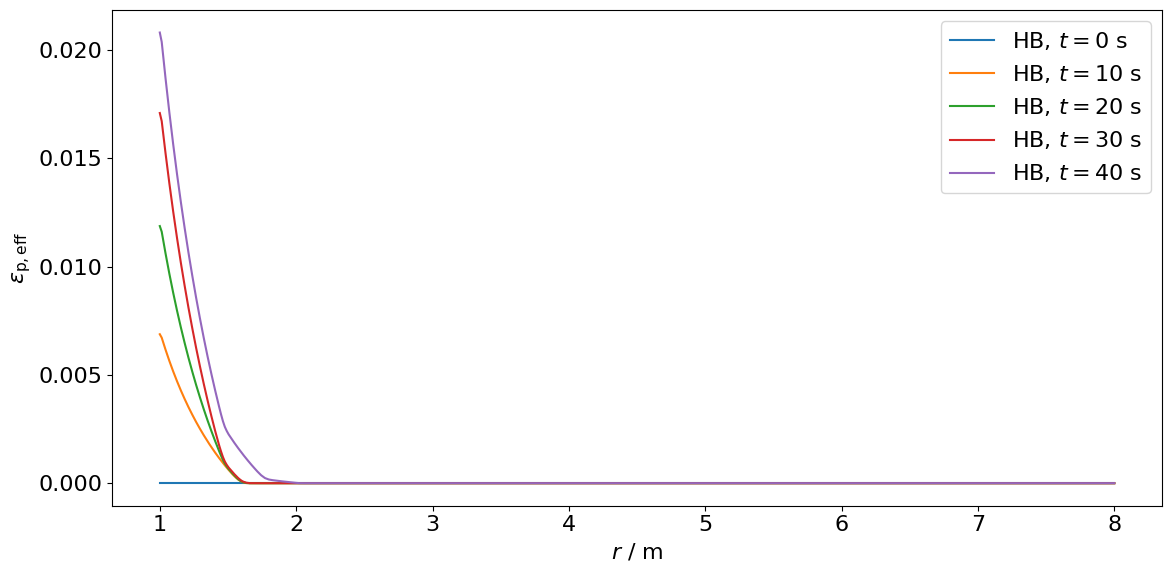

In [10]:
# sns.set_palette("Paired",n_colors=1000)
fig, ax = plt.subplots(figsize=(12,6))
for i in [0,10,20,30,40]:
# for i in [40]:
    ax.plot(np.array(raxis).T[0]/1000,pvd_hb.read_set_data(i, 'EquivalentPlasticStrain', pointsetarray=raxis),
            label='HB, $t = %i$ s' %i, ls='-')

ax.set_xlabel('$r$ / m')
ax.set_ylabel('$\\epsilon_\\mathrm{p,eff}$')
ax.legend()
fig.tight_layout();

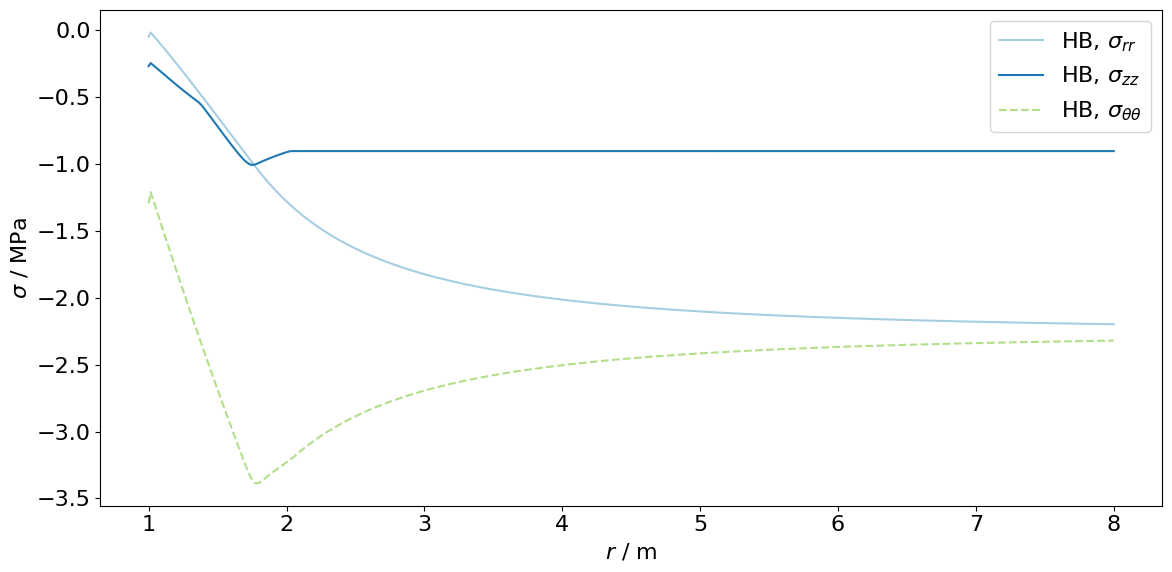

In [11]:
sns.set_palette("Paired",n_colors=10)
fig, ax = plt.subplots(figsize=(12,6))

ax.plot(np.array(raxis).T[0]/1000,pvd_hb.read_set_data(i, 'sigma', pointsetarray=raxis).T[0],
            label='HB, $\\sigma_{rr}$')
ax.plot(np.array(raxis).T[0]/1000,pvd_hb.read_set_data(i, 'sigma', pointsetarray=raxis).T[1],
            label='HB, $\\sigma_{zz}$')
ax.plot(np.array(raxis).T[0]/1000,pvd_hb.read_set_data(i, 'sigma', pointsetarray=raxis).T[2],
            label='HB, $\\sigma_{\\theta\\theta}$', ls='--')


ax.set_xlabel('$r$ / m')
ax.set_ylabel('$\\sigma$ / MPa')
ax.legend()
fig.tight_layout();